In [6]:
import torch, torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.models as tvm
import numpy as np
import torchvision.models as models
from torchvision.models import ResNet50_Weights 
ckpt = torch.load("test_feats.pt", map_location="cpu")
X_test, y = ckpt["X_test"], ckpt["y"]

/tmp/ipykernel_1321/1563123160.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("test_feats.pt", map_location="cpu")


In [7]:
emb = torch.load("emb.pt", map_location="cpu")

/tmp/ipykernel_1321/543991217.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load("emb.pt", map_location="cpu")


In [8]:
ckpt = torch.load("train_feats.pt", map_location="cpu")
X_train, y = ckpt["X_train"], ckpt["y"]

/tmp/ipykernel_1321/943266446.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("train_feats.pt", map_location="cpu")


In [12]:
X_test_parts, y_parts = [], []

for i in range(0, 50, 5):  
    #for k = 10, we divide test set into 10 parts, and each parts have 5 unseen categories
    mask = (y >= i) & (y < i + 5)
    X_test_parts.append(X_test[mask])
    y_parts.append(y[mask])

(X_test_1, X_test_2, X_test_3, X_test_4, X_test_5,
 X_test_6, X_test_7, X_test_8, X_test_9, X_test_10) = X_test_parts

(y_test_1, y_test_2, y_test_3, y_test_4, y_test_5,
 y_test_6, y_test_7, y_test_8, y_test_9, y_test_10) = y_parts
# check
for i, x in enumerate(X_test_parts, 1):
    print(f"X_test_{i}.shape = {x.shape}, y range = {y_parts[i-1].min().item()}–{y_parts[i-1].max().item()}")



X_test_1.shape = torch.Size([2426, 2048]), y range = 0–4
X_test_2.shape = torch.Size([4556, 2048]), y range = 5–9
X_test_3.shape = torch.Size([4541, 2048]), y range = 10–14
X_test_4.shape = torch.Size([4833, 2048]), y range = 15–19
X_test_5.shape = torch.Size([4108, 2048]), y range = 20–24
X_test_6.shape = torch.Size([2728, 2048]), y range = 25–29
X_test_7.shape = torch.Size([3786, 2048]), y range = 30–34
X_test_8.shape = torch.Size([3594, 2048]), y range = 35–39
X_test_9.shape = torch.Size([3599, 2048]), y range = 40–44
X_test_10.shape = torch.Size([3123, 2048]), y range = 45–49


In [13]:
import torch

X_train_parts, y_train_parts = [], []

for i in range(0, 50, 5):
    # same process but need change mask to proof unseen for train sets
    mask = (y < i) | (y >= i + 5)
    X_train_parts.append(X_train[mask])
    y_train_parts.append(y[mask])


(X_train_1, X_train_2, X_train_3, X_train_4, X_train_5,
 X_train_6, X_train_7, X_train_8, X_train_9, X_train_10) = X_train_parts

(y_train_1, y_train_2, y_train_3, y_train_4, y_train_5,
 y_train_6, y_train_7, y_train_8, y_train_9, y_train_10) = y_train_parts

# === check each train split's class distribution ===
for i in range(10):
    y_i = y_train_parts[i]
    uniq, counts = torch.unique(y_i, return_counts=True)
    uniq, counts = uniq.tolist(), counts.tolist()
    
    print(f"\nX_train_{i+1}.shape = {X_train_parts[i].shape}")
    print("distribution（class: count）:")
    for j in range(0, len(uniq), 10):
        line = ", ".join(f"{c}:{n}" for c, n in zip(uniq[j:j+10], counts[j:j+10]))
        print("   " + line)




X_train_1.shape = torch.Size([34868, 2048])
distribution（class: count）:
   5:895, 6:567, 7:728, 8:1028, 9:1338, 10:549, 11:1344, 12:946, 13:1038, 14:664
   15:1033, 16:874, 17:1202, 18:872, 19:852, 20:779, 21:684, 22:1645, 23:709, 24:291
   25:720, 26:1019, 27:100, 28:704, 29:185, 30:730, 31:728, 32:747, 33:713, 34:868
   35:1088, 36:512, 37:310, 38:696, 39:988, 40:1420, 41:500, 42:188, 43:291, 44:1200
   45:877, 46:215, 47:272, 48:589, 49:1170

X_train_2.shape = torch.Size([32738, 2048])
distribution（class: count）:
   0:1046, 1:383, 2:193, 3:174, 4:630, 10:549, 11:1344, 12:946, 13:1038, 14:664
   15:1033, 16:874, 17:1202, 18:872, 19:852, 20:779, 21:684, 22:1645, 23:709, 24:291
   25:720, 26:1019, 27:100, 28:704, 29:185, 30:730, 31:728, 32:747, 33:713, 34:868
   35:1088, 36:512, 37:310, 38:696, 39:988, 40:1420, 41:500, 42:188, 43:291, 44:1200
   45:877, 46:215, 47:272, 48:589, 49:1170

X_train_3.shape = torch.Size([32753, 2048])
distribution（class: count）:
   0:1046, 1:383, 2:193, 3:1

In [14]:
print(emb.shape, 
X_train_1.shape ,
X_test_1.shape, 
y_train_1.shape ,
y_test_1.shape) 

torch.Size([50, 768]) torch.Size([34868, 2048]) torch.Size([2426, 2048]) torch.Size([34868]) torch.Size([2426])


In [ ]:
#ridge


========== Outer Fold 01 ==========
Inner 3-fold mean accuracy by λ:
  λ=0.1   -> 0.3014
  λ=1.0   -> 0.2992
  λ=10.0  -> 0.3040
  λ=100.0 -> 0.2828
Chosen λ: 10.0  | inner-CV time: 4.67s
Accuracy: 0.4225
Macro P/R/F1: 0.5572 / 0.5984 / 0.4476
RMSE: 0.037637  MAE: 0.028922
Outer train+eval time: 0.06s
Confusion Matrix (rows=true, cols=pred):
tensor([[ 23,   0,  98,   0, 925],
        [120,  37, 132,  19,  75],
        [  1,   0, 173,  17,   2],
        [  0,   0,   1, 173,   0],
        [  1,   0,  10,   0, 619]])
Learning-curve acc by frac: 0.1:0.406  0.2:0.409  0.4:0.411  0.6:0.417  0.8:0.421  1.0:0.423

========== Outer Fold 02 ==========
Inner 3-fold mean accuracy by λ:
  λ=0.1   -> 0.2567
  λ=1.0   -> 0.2593
  λ=10.0  -> 0.2650
  λ=100.0 -> 0.2523
Chosen λ: 10.0  | inner-CV time: 4.46s
Accuracy: 0.6982
Macro P/R/F1: 0.7523 / 0.6827 / 0.6813
RMSE: 0.031899  MAE: 0.024491
Outer train+eval time: 0.10s
Confusion Matrix (rows=true, cols=pred):
tensor([[ 345,   93,    0,  383,   74],
 

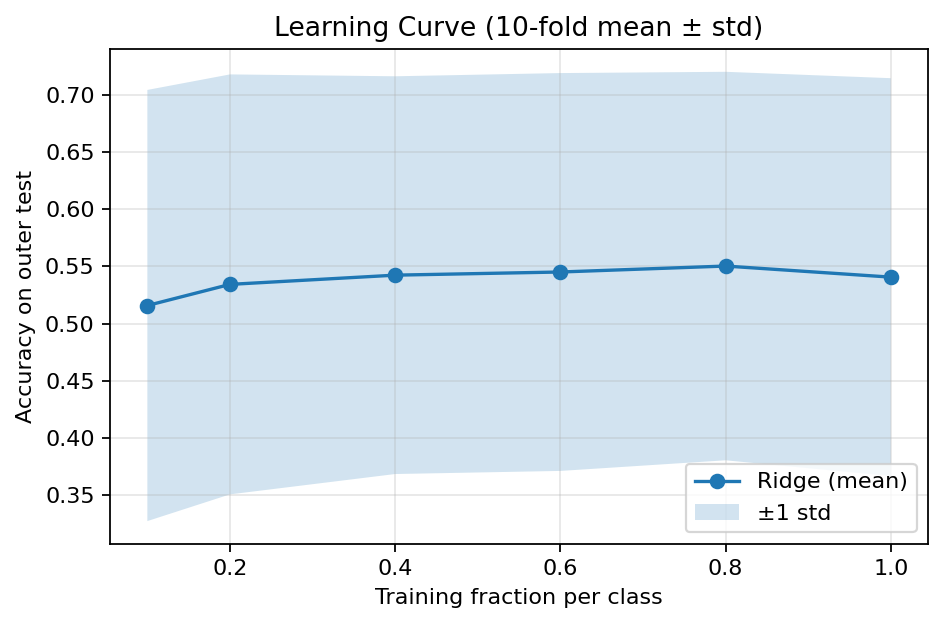

In [25]:
import time, math
import numpy as np
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def l2norm(X):
    return X / (X.norm(dim=1, keepdim=True) + 1e-12)

def uniq_sorted_cpu(y):  
    return sorted(list(set(y.detach().cpu().numpy().tolist())))

def fit_ridge(Xtr, Ytr, lam):
    d = Xtr.size(1)
    XtX = Xtr.T @ Xtr
    XtY = Xtr.T @ Ytr
    I   = torch.eye(d, device=Xtr.device)
    return torch.linalg.solve(XtX + lam * I, XtY)  # [feat, emb]

@torch.inference_mode()
def predict_labels(X, W, E, class_ids):
    Z = l2norm(X @ W)                # [N, D_txt]
    P = l2norm(E[class_ids])         # [U, D_txt]
    sim = Z @ P.T
    pred_ix = sim.argmax(dim=1).cpu().numpy()
    y_pred = np.array([class_ids[j] for j in pred_ix], dtype=np.int64)
    return y_pred, Z

def accuracy_manual(y_true, y_pred):
    return sum(1 for a,b in zip(y_true, y_pred) if a == b) / len(y_true)

def confusion_matrix_manual(y_true, y_pred, labels):
    L = len(labels); idx = {c:i for i,c in enumerate(labels)}
    cm = torch.zeros((L, L), dtype=torch.int64)
    for t,p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm

def macro_prf_from_cm(cm):
    cm = cm.to(torch.float64)
    tp = cm.diag()
    fp = cm.sum(0) - tp
    fn = cm.sum(1) - tp
    prec_i = torch.where(tp+fp>0, tp/(tp+fp), torch.zeros_like(tp))
    rec_i  = torch.where(tp+fn>0, tp/(tp+fn), torch.zeros_like(tp))
    f1_i   = torch.where(prec_i+rec_i>0, 2*prec_i*rec_i/(prec_i+rec_i), torch.zeros_like(tp))
    return float(prec_i.mean()), float(rec_i.mean()), float(f1_i.mean())

def embedding_errors(Z_pred, y_true, E):  # RMSE/MAE in embedding space
    tgt = l2norm(E[torch.as_tensor(y_true, device=Z_pred.device)])
    diff = (Z_pred - tgt).detach().cpu().numpy()
    mse = float((diff**2).mean())
    rmse = float(np.sqrt(mse))
    mae = float(np.abs(diff).mean())
    return rmse, mae

def split_by_val_classes(X, y, val_classes):
    s = set(val_classes)
    mask_val = torch.tensor([int(int(t.item()) in s) for t in y], device=y.device, dtype=torch.bool)
    mask_tr  = ~mask_val
    return X[mask_tr], y[mask_tr], X[mask_val], y[mask_val]


def stratified_take_by_frac(X, y, frac, min_take=1):
    cls = uniq_sorted_cpu(y)
    idxs = []
    for c in cls:
        pos = torch.where(y == c)[0]
        k = max(min_take, math.ceil(pos.numel() * frac))
        take = pos[torch.randperm(pos.numel(), device=y.device)[:k]]
        idxs.append(take)
    idxs = torch.cat(idxs, dim=0)
    return X.index_select(0, idxs), y.index_select(0, idxs)


def inner_cv_choose_lambda(Xtr_full, ytr_full, E, lam_grid=(0.1, 1.0, 10.0, 100.0)):
    seen = uniq_sorted_cpu(ytr_full)
    assert len(seen) == 45, f"expect 45 seen classes, got {len(seen)}"
    folds = [seen[0:15], seen[15:30], seen[30:45]]

    lambda_means = {}
    t0 = time.perf_counter()
    for lam in lam_grid:
        accs = []
        for val_cls in folds:
            Xtr, ytr, Xva, yva = split_by_val_classes(Xtr_full, ytr_full, val_cls)
            W = fit_ridge(l2norm(Xtr), E[ytr], lam)
            y_pred, _ = predict_labels(l2norm(Xva), W, E, sorted(val_cls))
            accs.append(accuracy_manual(yva.cpu().numpy().tolist(), y_pred.tolist()))
        lambda_means[float(lam)] = float(np.mean(accs))
    t1 = time.perf_counter()
    time_sec = t1 - t0

    best_lam = min(
        lam_grid,
        key=lambda l: (-lambda_means[float(l)], float(l))
    )
    return float(best_lam), lambda_means, time_sec

def learning_curve_on_outer_fold(Xtr, ytr, Xte, yte, E, best_lambda,
                                 fractions=(0.1, 0.2, 0.4, 0.6, 0.8, 1.0)):
    accs, times = [], []
    for f in fractions:
        t0 = time.perf_counter()
        Xsub, ysub = stratified_take_by_frac(Xtr, ytr, f)
        W = fit_ridge(l2norm(Xsub), E[ysub], best_lambda)
        y_pred, _ = predict_labels(l2norm(Xte), W, E, uniq_sorted_cpu(torch.as_tensor(yte)))
        accs.append(accuracy_manual(yte, y_pred.tolist()))
        times.append(time.perf_counter() - t0)
    return np.array(accs, float), np.array(times, float)


E_all = l2norm(emb.float().to(device))

outer_rows = []               
inner_table_acc = {0.1: [], 1.0: [], 10.0: [], 100.0: []}
inner_times = []          
outer_times = []               

fractions = (0.1, 0.2, 0.4, 0.6, 0.8, 1.0)
lc_all_acc = []              
lc_all_time = []               

for i in range(1, 10+1):
    print(f"\n========== Outer Fold {i:02d} ==========")

    Xtr = globals()[f"X_train_{i}"].float().to(device)
    ytr = globals()[f"y_train_{i}"].long().to(device)
    Xte = globals()[f"X_test_{i}"].float().to(device)
    yte = globals()[f"y_test_{i}"].long().cpu().numpy().tolist()


    best_lam, lam_means, t_sec = inner_cv_choose_lambda(Xtr, ytr, E_all, lam_grid=(0.1, 1.0, 10.0, 100.0))
    inner_times.append(t_sec)
    print("Inner 3-fold mean accuracy by λ:")
    for lam in (0.1, 1.0, 10.0, 100.0):
        m = lam_means[lam]; inner_table_acc[lam].append(m)
        print(f"  λ={lam:<5} -> {m:.4f}")
    print(f"Chosen λ: {best_lam}  | inner-CV time: {t_sec:.2f}s")


    t0 = time.perf_counter()
    W = fit_ridge(l2norm(Xtr), E_all[ytr], best_lam)
    unseen_ids = uniq_sorted_cpu(torch.as_tensor(yte))
    y_pred, Z_te = predict_labels(l2norm(Xte), W, E_all, unseen_ids)

    acc = accuracy_manual(yte, y_pred.tolist())
    cm  = confusion_matrix_manual(yte, y_pred.tolist(), unseen_ids)
    mp, mr, mf1 = macro_prf_from_cm(cm)
    rmse, mae = embedding_errors(Z_te, yte, E_all)
    t1 = time.perf_counter(); outer_times.append(t1 - t0)


    print(f"Accuracy: {acc:.4f}")
    print(f"Macro P/R/F1: {mp:.4f} / {mr:.4f} / {mf1:.4f}")
    print(f"RMSE: {rmse:.6f}  MAE: {mae:.6f}")
    print(f"Outer train+eval time: {outer_times[-1]:.2f}s")
    print("Confusion Matrix (rows=true, cols=pred):")
    print(cm)
    np.save(f"cm_fold{i:02d}.npy", cm.cpu().numpy())  

    outer_rows.append({
        "fold": i, "lambda": best_lam,
        "acc": acc, "macro_p": mp, "macro_r": mr, "macro_f1": mf1,
        "rmse": rmse, "mae": mae
    })


    lc_acc, lc_time = learning_curve_on_outer_fold(Xtr, ytr, Xte, yte, E_all, best_lam, fractions=fractions)
    lc_all_acc.append(lc_acc); lc_all_time.append(lc_time)
    print("Learning-curve acc by frac:", "  ".join([f"{f:.1f}:{a:.3f}" for f,a in zip(fractions, lc_acc)]))


def mean_std(vals):
    vals = np.array(vals, dtype=float)
    return float(vals.mean()), float(vals.std(ddof=1))  # sample std

acc_mean,   acc_std   = mean_std([r["acc"] for r in outer_rows])
mp_mean,    mp_std    = mean_std([r["macro_p"] for r in outer_rows])
mr_mean,    mr_std    = mean_std([r["macro_r"] for r in outer_rows])
mf1_mean,   mf1_std   = mean_std([r["macro_f1"] for r in outer_rows])
rmse_mean,  rmse_std  = mean_std([r["rmse"] for r in outer_rows])
mae_mean,   mae_std   = mean_std([r["mae"] for r in outer_rows])

print("\n========== 10-Fold Overall Summary (Ridge) ==========")
print(f"Accuracy : {acc_mean:.4f} ± {acc_std:.4f}")
print(f"Macro P  : {mp_mean:.4f} ± {mp_std:.4f}")
print(f"Macro R  : {mr_mean:.4f} ± {mr_std:.4f}")
print(f"Macro F1 : {mf1_mean:.4f} ± {mf1_std:.4f}")
print(f"RMSE     : {rmse_mean:.6f} ± {rmse_std:.6f}")
print(f"MAE      : {mae_mean:.6f} ± {mae_std:.6f}")

print("\n========== Inner-CV Mean Accuracy by λ (averaged over 10 outer folds) ==========")
for lam in (0.1, 1.0, 10.0, 100.0):
    m, s = mean_std(inner_table_acc[lam])
    print(f"λ={lam:<5}  mean_acc={m:.4f} ± {s:.4f}  (n={len(inner_table_acc[lam])})")

print("\n========== Timing ==========")
print(f"Inner-CV time per fold (mean ± std): {np.mean(inner_times):.2f}s ± {np.std(inner_times, ddof=1):.2f}s")
print(f"Outer train+eval time per fold (mean ± std): {np.mean(outer_times):.2f}s ± {np.std(outer_times, ddof=1):.2f}s")


lc_all_acc = np.stack(lc_all_acc, axis=0)   # [10, F]
mean_curve = lc_all_acc.mean(axis=0)
std_curve  = lc_all_acc.std(axis=0, ddof=1)

plt.figure(figsize=(6,4), dpi=160)
xs = np.array(fractions)
plt.plot(xs, mean_curve, marker='o', label='Ridge (mean)')
plt.fill_between(xs, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2, label='±1 std')
plt.xlabel('Training fraction per class')
plt.ylabel('Accuracy on outer test')
plt.title('Learning Curve (10-fold mean ± std)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
# MLP(reg+early stop)


========== Outer Fold 01 ==========
Inner 3-fold mean accuracy by (p, hidden):
  p=0.0, h= 256 -> 0.3419
  p=0.0, h= 512 -> 0.3351
  p=0.0, h=1024 -> 0.3405
  p=0.4, h= 256 -> 0.3378
  p=0.4, h= 512 -> 0.3463
  p=0.4, h=1024 -> 0.3415
  p=0.6, h= 256 -> 0.3344
  p=0.6, h= 512 -> 0.3290
  p=0.6, h=1024 -> 0.3284
Chosen: dropout_p=0.4, hidden_dim=512 | inner-CV time: 91.22s
Accuracy: 0.4196
Macro P/R/F1: 0.5736 / 0.5799 / 0.4839
RMSE: 0.038116  MAE: 0.029428
Outer train+eval time: 13.71s
Confusion Matrix (rows=true, cols=pred; class order = unseen_ids):
tensor([[ 36,   0, 951,   0,  59],
        [132, 102,  61,  31,  57],
        [ 35,   0, 133,  11,  14],
        [  0,   0,   0, 174,   0],
        [ 37,   1,  17,   2, 573]])
Learning-curve acc by frac: 0.1:0.424  0.2:0.440  0.4:0.421  0.6:0.433  0.8:0.410  1.0:0.428

========== Outer Fold 02 ==========
Inner 3-fold mean accuracy by (p, hidden):
  p=0.0, h= 256 -> 0.3008
  p=0.0, h= 512 -> 0.3017
  p=0.0, h=1024 -> 0.2964
  p=0.4, h= 25

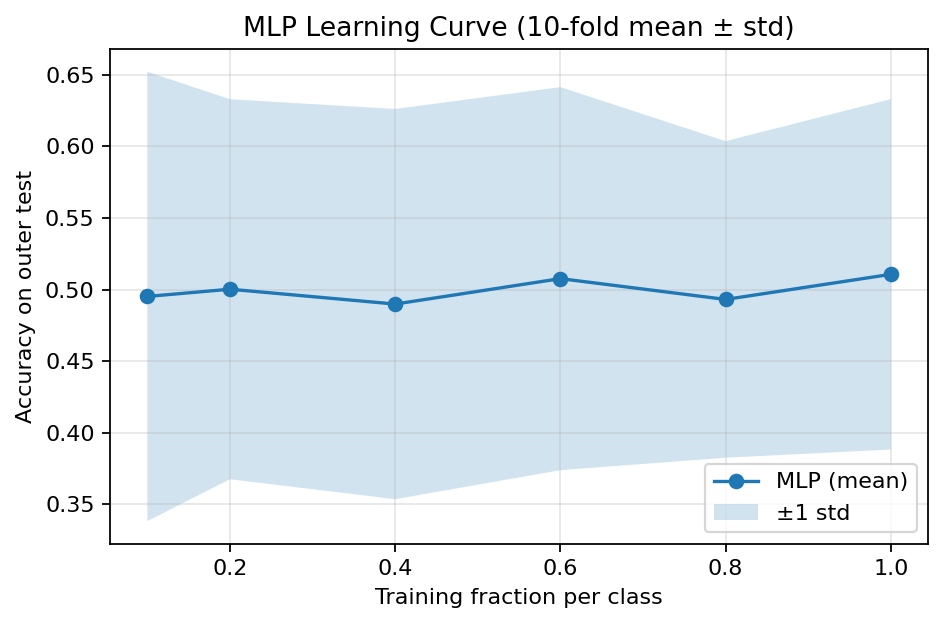

In [27]:
import time, math
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def l2norm(X):
    return X / (X.norm(dim=1, keepdim=True) + 1e-12)

def uniq_sorted_cpu(y):
    return sorted(list(set(y.detach().cpu().numpy().tolist())))

def confusion_matrix_manual(y_true, y_pred, labels):
    L = len(labels); idx = {c:i for i,c in enumerate(labels)}
    cm = torch.zeros((L, L), dtype=torch.int64)
    for t,p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm

def accuracy_manual(y_true, y_pred):
    return sum(1 for a,b in zip(y_true, y_pred) if a == b) / len(y_true)

def macro_prf_from_cm(cm):
    cm = cm.to(torch.float64)
    tp = cm.diag()
    fp = cm.sum(0) - tp
    fn = cm.sum(1) - tp
    prec_i = torch.where(tp+fp>0, tp/(tp+fp), torch.zeros_like(tp))
    rec_i  = torch.where(tp+fn>0, tp/(tp+fn), torch.zeros_like(tp))
    f1_i   = torch.where(prec_i+rec_i>0, 2*prec_i*rec_i/(prec_i+rec_i), torch.zeros_like(tp))
    return float(prec_i.mean()), float(rec_i.mean()), float(f1_i.mean())

def embedding_errors(Z_pred, y_true, E):  # RMSE/MAE in embedding space
    tgt = l2norm(E[torch.as_tensor(y_true, device=Z_pred.device)])
    diff = (Z_pred - tgt).detach().cpu().numpy()
    mse = float((diff**2).mean())
    rmse = float(np.sqrt(mse))
    mae = float(np.abs(diff).mean())
    return rmse, mae

def split_by_val_classes(X, y, val_classes):
    s = set(val_classes)
    mask_va = torch.tensor([int(int(t.item()) in s) for t in y], device=y.device, dtype=torch.bool)
    mask_tr = ~mask_va
    return X[mask_tr], y[mask_tr], X[mask_va], y[mask_va]


def stratified_take_by_frac(X, y, frac, min_take=1):
    cls = uniq_sorted_cpu(y)
    idxs = []
    for c in cls:
        pos = torch.where(y == c)[0]
        k = max(min_take, math.ceil(pos.numel() * frac))
        take = pos[torch.randperm(pos.numel(), device=y.device)[:k]]
        idxs.append(take)
    idxs = torch.cat(idxs, dim=0)
    return X.index_select(0, idxs), y.index_select(0, idxs)

@torch.inference_mode()
def predict_labels_from_model(model, X, E, class_ids):
    Z = l2norm(model(l2norm(X)))
    P = l2norm(E[class_ids])
    sim = Z @ P.T
    pred_ix = sim.argmax(dim=1).cpu().numpy()
    y_pred = np.array([class_ids[j] for j in pred_ix], dtype=np.int64)
    return y_pred, Z

class Img2Txt(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim=512, dropout_p=0.4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(hidden_dim, out_dim),
        )
    def forward(self, x):
        z = self.net(x)
        return z / (z.norm(dim=1, keepdim=True) + 1e-12)

def inner_cv_choose_hyper(Xtr_full, ytr_full, E,
                          p_grid=(0.0, 0.4, 0.6),
                          h_grid=(256, 512, 1024),
                          lr=1e-3, weight_decay=5e-3,
                          patience=5, max_epoch=30, bs=256):
    seen = uniq_sorted_cpu(ytr_full)
    assert len(seen) == 45, f"expect 45 seen classes, got {len(seen)}"
    folds = [seen[0:15], seen[15:30], seen[30:45]]

    grid_scores = {}  # (p,h) -> mean_acc
    t0 = time.perf_counter()

    for p in p_grid:
        for h in h_grid:
            fold_accs = []
            for val_classes in folds:
                Xtr, ytr, Xva, yva = split_by_val_classes(Xtr_full, ytr_full, val_classes)
                tr_dl = DataLoader(TensorDataset(l2norm(Xtr), ytr), batch_size=bs, shuffle=True)
                va_dl = DataLoader(TensorDataset(l2norm(Xva), yva), batch_size=512, shuffle=False)

                model = Img2Txt(Xtr.size(1), E.size(1), hidden_dim=h, dropout_p=p).to(device)
                opt = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
                mse = nn.MSELoss()

                best_acc, best_state, wait = 0.0, None, 0
                for ep in range(max_epoch):
                    model.train()
                    for xb, yb in tr_dl:
                        xb = xb.to(device); yb = yb.to(device)
                        loss = mse(model(xb), E[yb])
                        opt.zero_grad(); loss.backward(); opt.step()

        
                    model.eval()
                    cls = sorted(val_classes)
                    correct = total = 0
                    with torch.no_grad():
                        for xb, yb in va_dl:
                            xb = xb.to(device); yb = yb.to(device)
                            pred, _ = predict_labels_from_model(model, xb, E, cls)
                            correct += int((torch.as_tensor(pred, device=yb.device) == yb).sum().item())
                            total   += int(yb.numel())
                    val_acc = correct / max(1, total)

                    if val_acc > best_acc:
                        best_acc = val_acc
                        best_state = {k: v.detach().cpu().clone() for k,v in model.state_dict().items()}
                        wait = 0
                    else:
                        wait += 1
                        if wait >= patience:
                            break
                fold_accs.append(best_acc)
            grid_scores[(float(p), int(h))] = float(np.mean(fold_accs))

    t1 = time.perf_counter()
    inner_time = t1 - t0

    best_p, best_h = min(
        grid_scores.keys(),
        key=lambda ph: (-grid_scores[ph], ph[1], ph[0])
    )
    return (best_p, best_h), grid_scores, inner_time

def learning_curve_on_outer_fold(Xtr, ytr, Xte, yte, E, p, h,
                                 lr=1e-3, weight_decay=5e-3,
                                 patience=5, max_epoch=30, bs=256,
                                 fractions=(0.1, 0.2, 0.4, 0.6, 0.8, 1.0)):
    accs, times = [], []
    mse = nn.MSELoss()
    in_dim, out_dim = Xtr.size(1), E.size(1)

    for f in fractions:
        t0 = time.perf_counter()
        Xsub, ysub = stratified_take_by_frac(Xtr, ytr, f)
        tr_dl = DataLoader(TensorDataset(l2norm(Xsub), ysub), batch_size=bs, shuffle=True)

        model = Img2Txt(in_dim, out_dim, hidden_dim=h, dropout_p=p).to(device)
        opt   = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

        best_loss, best_state, wait = 1e9, None, 0
        for ep in range(max_epoch):
            model.train()
            running = 0.0
            for xb, yb in tr_dl:
                xb = xb.to(device); yb = yb.to(device)
                loss = mse(model(xb), E[yb])
                opt.zero_grad(); loss.backward(); opt.step()
                running += float(loss.item()) * yb.size(0)
            avg = running / len(tr_dl.dataset)
            if avg < best_loss:
                best_loss = avg; best_state = {k:v.detach().cpu().clone() for k,v in model.state_dict().items()}
                wait = 0
            else:
                wait += 1
                if wait >= patience: break
        model.load_state_dict({k:v.to(device) for k,v in best_state.items()})
        model.eval()

        cls_unseen = uniq_sorted_cpu(torch.as_tensor(yte))
        y_pred, _ = predict_labels_from_model(model, Xte, E, cls_unseen)
        accs.append(accuracy_manual(yte, y_pred.tolist()))
        times.append(time.perf_counter() - t0)

    return np.array(accs, float), np.array(times, float)


E_all = l2norm(emb.float().to(device))

outer_rows = []                      
inner_times = []                   
outer_times = []                     
grid_log = []                       
fractions = (0.1, 0.2, 0.4, 0.6, 0.8, 1.0)
lc_all_acc = []                 
lc_all_time = []    
chosen_list = []                 

for i in range(1, 10+1):
    print(f"\n========== Outer Fold {i:02d} ==========")
    Xtr = globals()[f"X_train_{i}"].float().to(device)
    ytr = globals()[f"y_train_{i}"].long().to(device)
    Xte = globals()[f"X_test_{i}"].float().to(device)
    yte = globals()[f"y_test_{i}"].long().to(device)
    yte_np = yte.cpu().numpy().tolist()

    
    (best_p, best_h), grid_scores, t_sec = inner_cv_choose_hyper(
        Xtr, ytr, E_all,
        p_grid=(0.0, 0.4, 0.6), h_grid=(256, 512, 1024),
        lr=1e-3, weight_decay=5e-3, patience=5, max_epoch=30, bs=256
    )
    inner_times.append(t_sec); chosen_list.append((best_p, best_h))
    print("Inner 3-fold mean accuracy by (p, hidden):")

    for p in (0.0, 0.4, 0.6):
        for h in (256, 512, 1024):
            m = grid_scores[(p, h)]
            grid_log.append({"fold": i, "p": p, "hidden": h, "mean_acc": m})
            print(f"  p={p:.1f}, h={h:4d} -> {m:.4f}")
    print(f"Chosen: dropout_p={best_p}, hidden_dim={best_h} | inner-CV time: {t_sec:.2f}s")

    # ---- 外层最终训练 + 测试 ----
    in_dim, out_dim = Xtr.size(1), E_all.size(1)
    model = Img2Txt(in_dim, out_dim, hidden_dim=best_h, dropout_p=best_p).to(device)
    opt   = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=5e-3)
    mse   = nn.MSELoss()
    tr_dl_full = DataLoader(TensorDataset(l2norm(Xtr), ytr), batch_size=256, shuffle=True)

    t0 = time.perf_counter()
    best_state, wait, best_loss = None, 0, 1e9
    for ep in range(30):
        model.train()
        running = 0.0
        for xb, yb in tr_dl_full:
            xb = xb.to(device); yb = yb.to(device)
            loss = mse(model(xb), E_all[yb])
            opt.zero_grad(); loss.backward(); opt.step()
            running += float(loss.item()) * yb.size(0)
        avg = running / len(tr_dl_full.dataset)
        if avg < best_loss:
            best_loss = avg
            best_state = {k: v.detach().cpu().clone() for k,v in model.state_dict().items()}
            wait = 0
        else:
            wait += 1
            if wait >= 5: break
    model.load_state_dict({k: v.to(device) for k,v in best_state.items()})
    model.eval()

    cls_unseen = uniq_sorted_cpu(yte)
    y_pred, Z_te = predict_labels_from_model(model, Xte, E_all, cls_unseen)
    acc = accuracy_manual(yte_np, y_pred.tolist())
    cm  = confusion_matrix_manual(yte_np, y_pred.tolist(), cls_unseen)
    mp, mr, mf1 = macro_prf_from_cm(cm)
    rmse, mae = embedding_errors(Z_te, yte_np, E_all)
    t1 = time.perf_counter(); outer_times.append(t1 - t0)

    print(f"Accuracy: {acc:.4f}")
    print(f"Macro P/R/F1: {mp:.4f} / {mr:.4f} / {mf1:.4f}")
    print(f"RMSE: {rmse:.6f}  MAE: {mae:.6f}")
    print(f"Outer train+eval time: {outer_times[-1]:.2f}s")
    print("Confusion Matrix (rows=true, cols=pred; class order = unseen_ids):")
    print(cm)
    np.save(f"mlp_cm_fold{i:02d}.npy", cm.cpu().numpy())  # 可注释掉

    outer_rows.append({
        "fold": i, "p": best_p, "hidden": best_h,
        "acc": acc, "macro_p": mp, "macro_r": mr, "macro_f1": mf1,
        "rmse": rmse, "mae": mae
    })

 
    lc_acc, lc_time = learning_curve_on_outer_fold(
        Xtr, ytr, Xte, yte_np, E_all, best_p, best_h,
        lr=1e-3, weight_decay=5e-3, patience=5, max_epoch=30, bs=256,
        fractions=fractions
    )
    lc_all_acc.append(lc_acc); lc_all_time.append(lc_time)
    print("Learning-curve acc by frac:", "  ".join([f"{f:.1f}:{a:.3f}" for f,a in zip(fractions, lc_acc)]))

def mean_std(vals):
    vals = np.array(vals, dtype=float)
    return float(vals.mean()), float(vals.std(ddof=1))  

acc_mean,   acc_std   = mean_std([r["acc"] for r in outer_rows])
mp_mean,    mp_std    = mean_std([r["macro_p"] for r in outer_rows])
mr_mean,    mr_std    = mean_std([r["macro_r"] for r in outer_rows])
mf1_mean,   mf1_std   = mean_std([r["macro_f1"] for r in outer_rows])
rmse_mean,  rmse_std  = mean_std([r["rmse"] for r in outer_rows])
mae_mean,   mae_std   = mean_std([r["mae"] for r in outer_rows])

print("\n========== 10-Fold Overall Summary (MLP) ==========")
print("Chosen (dropout_p, hidden) per fold:", chosen_list)
print(f"Accuracy : {acc_mean:.4f} ± {acc_std:.4f}")
print(f"Macro P  : {mp_mean:.4f} ± {mp_std:.4f}")
print(f"Macro R  : {mr_mean:.4f} ± {mr_std:.4f}")
print(f"Macro F1 : {mf1_mean:.4f} ± {mf1_std:.4f}")
print(f"RMSE     : {rmse_mean:.6f} ± {rmse_std:.6f}")
print(f"MAE      : {mae_mean:.6f} ± {mae_std:.6f}")

print("\n========== Timing ==========")
print(f"Inner-CV time per outer fold (mean ± std): {np.mean(inner_times):.2f}s ± {np.std(inner_times, ddof=1):.2f}s")
print(f"Outer train+eval time per fold (mean ± std): {np.mean(outer_times):.2f}s ± {np.std(outer_times, ddof=1):.2f}s")


lc_all_acc = np.stack(lc_all_acc, axis=0)   # [10, F]
mean_curve = lc_all_acc.mean(axis=0)
std_curve  = lc_all_acc.std(axis=0, ddof=1)

plt.figure(figsize=(6,4), dpi=160)
xs = np.array(fractions, float)
plt.plot(xs, mean_curve, marker='o', label='MLP (mean)')
plt.fill_between(xs, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2, label='±1 std')
plt.xlabel('Training fraction per class')
plt.ylabel('Accuracy on outer test')
plt.title('MLP Learning Curve (10-fold mean ± std)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("mlp_learning_curve.png", bbox_inches="tight") 
plt.show()


In [28]:
#F-CLAWGAN

In [18]:

import functools, builtins
print = functools.partial(builtins.print, flush=True)

import torch, numpy as np
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.backends.cudnn.benchmark = True
torch.manual_seed(42); torch.cuda.manual_seed_all(42)
print(">>> Script loaded. Device:", device)


def l2norm(X):
    return X / (X.norm(dim=1, keepdim=True) + 1e-12)

def unique_sorted_cpu(y_tensor):
    return sorted(list(set(y_tensor.detach().cpu().numpy().tolist())))

def split_by_val_classes(X, y, val_classes):
    s = set(val_classes)
    mask_val = torch.tensor([int(int(t.item()) in s) for t in y], device=y.device, dtype=torch.bool)
    mask_tr  = ~mask_val
    return X[mask_tr], y[mask_tr], X[mask_val], y[mask_val]

def accuracy_manual(y_true, y_pred):
    return sum(1 for a,b in zip(y_true, y_pred) if a == b) / len(y_true)

def confusion_matrix_manual(y_true, y_pred, labels):
    L = len(labels); idx = {c:i for i,c in enumerate(labels)}
    cm = torch.zeros((L, L), dtype=torch.int64)
    for t,p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm

def macro_prf_from_cm(cm):
    cm = cm.to(torch.float64)
    tp = cm.diag(); fp = cm.sum(0) - tp; fn = cm.sum(1) - tp
    prec_i = torch.where(tp+fp>0, tp/(tp+fp), torch.zeros_like(tp))
    reca_i = torch.where(tp+fn>0, tp/(tp+fn), torch.zeros_like(tp))
    f1_i   = torch.where(prec_i+reca_i>0, 2*prec_i*reca_i/(prec_i+reca_i), torch.zeros_like(tp))
    return float(prec_i.mean()), float(reca_i.mean()), float(f1_i.mean())

def rmse_mae_visual(X_real, y_pred, gen_means_dict):
    diffs = []
    for xr, c in zip(X_real, y_pred):
        mu = gen_means_dict[int(c)]
        diffs.append((xr - mu).detach().cpu().numpy())
    diffs = np.stack(diffs, 0)
    mse = float((diffs**2).mean())
    rmse = float(np.sqrt(mse))
    mae = float(np.abs(diffs).mean())
    return rmse, mae


class Generator(nn.Module):
    def __init__(self, z_dim, sem_dim, feat_dim=2048, hidden=2048):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim + sem_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, feat_dim),
        )
    def forward(self, z, e):
        out = self.net(torch.cat([z, e], dim=1))
        return l2norm(out)  

class Critic(nn.Module):
    def __init__(self, sem_dim, feat_dim=2048, hidden=1024, n_cls=None):
        super().__init__()
        self.feat = nn.Sequential(
            nn.Linear(feat_dim + sem_dim, hidden),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.critic = nn.Linear(hidden, 1)
        self.aux = nn.Linear(hidden, n_cls) if n_cls else None
    def forward(self, x, e):
        h = self.feat(torch.cat([x, e], dim=1))
        s = self.critic(h)
        p = self.aux(h) if self.aux else None
        return s, p

class LinearClassifier(nn.Module):
    def __init__(self, feat_dim, num_classes):
        super().__init__()
        self.fc = nn.Linear(feat_dim, num_classes)
    def forward(self, x): return self.fc(x)


def grad_penalty(critic_func, real_x, fake_x, e, gp_lambda=10.0):
    bsz = real_x.size(0)
    eps = torch.rand(bsz, 1, device=real_x.device)
    inter = eps * real_x + (1 - eps) * fake_x
    inter.requires_grad_(True)
    out = critic_func(inter, e)
    grad = torch.autograd.grad(
        outputs=out,
        inputs=inter,
        grad_outputs=torch.ones_like(out),
        create_graph=True, retain_graph=True, only_inputs=True
    )[0]
    grad_norm = grad.view(bsz, -1).norm(2, dim=1)
    return gp_lambda * ((grad_norm - 1.0) ** 2).mean()

#training
def train_fclswgan_on_seen(Xtr, ytr, E, train_classes,
                           lambda_cls=1.0, z_dim=100, n_critic=5, gp_lambda=10.0,
                           lr_g=1e-4, lr_d=4e-4, batch_size=256, epochs=30,
                           log_tag=""):
    feat_dim = Xtr.size(1); sem_dim = E.size(1)
    mask = torch.tensor([int(int(t.item()) in set(train_classes)) for t in ytr],
                        device=ytr.device, dtype=torch.bool)
    Xs, Ys = Xtr[mask], ytr[mask]
    loader = DataLoader(TensorDataset(Xs, Ys), batch_size=batch_size, shuffle=True, drop_last=True)

    G = Generator(z_dim, sem_dim, feat_dim).to(device)
    D = Critic(sem_dim, feat_dim, n_cls=len(train_classes)).to(device)

    optG = optim.Adam(G.parameters(), lr=lr_g, betas=(0.5, 0.9))
    optD = optim.Adam(D.parameters(), lr=lr_d, betas=(0.5, 0.9))
    ce   = nn.CrossEntropyLoss(label_smoothing=0.05)
    cls2idx = {c:i for i,c in enumerate(sorted(train_classes))}

    for ep in range(epochs):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            eb = E[yb]; bsz = xb.size(0)
            y_idx = torch.tensor([cls2idx[int(t.item())] for t in yb], device=device)

            # ----- Train D -----
            for _ in range(n_critic):
                z = torch.randn(bsz, z_dim, device=device)
                xf = G(z, eb).detach()
                sr, pr = D(xb, eb)
                sf, pf = D(xf, eb)
                loss_D = -(sr.mean() - sf.mean()) \
                         + grad_penalty(lambda a,b: D(a,b)[0], xb, xf, eb, gp_lambda) \
                         + lambda_cls * ce(pr, y_idx)
                optD.zero_grad(); loss_D.backward(); optD.step()

            # ----- Train G -----
            z = torch.randn(bsz, z_dim, device=device)
            xf = G(z, eb)
            sf, pf = D(xf, eb)
            loss_G = -sf.mean() + lambda_cls * ce(pf, y_idx)
            optG.zero_grad(); loss_G.backward(); optG.step()

        if (ep+1) % 5 == 0 or ep == 0:
            print(f"    [G/D]{log_tag} epoch {ep+1}/{epochs} done")
    return G, None

# ---------- generate unseen features ----------
@torch.inference_mode()
def synthesize_features(G, E, class_ids, n_gen=400, z_dim=100):
    feats, labels = [], []
    for c in class_ids:
        e = E[torch.tensor([c], device=device)].repeat(n_gen, 1)
        z = torch.randn(n_gen, z_dim, device=device)
        feats.append(G(z, e))
        labels += [c]*n_gen
    return torch.cat(feats, 0), torch.tensor(labels, device=device)

# ---------- linear classifier ----------
def train_linear_classifier(X, y, class_ids, lr=1e-4, epochs=30, bs=512):
    cls2idx = {c:i for i,c in enumerate(sorted(class_ids))}
    y_idx = torch.tensor([cls2idx[int(t.item())] for t in y], device=device)
    loader = DataLoader(TensorDataset(X, y_idx), batch_size=bs, shuffle=True)
    C = LinearClassifier(X.size(1), len(class_ids)).to(device)
    opt = optim.Adam(C.parameters(), lr=lr)
    ce = nn.CrossEntropyLoss(label_smoothing=0.05)
    for ep in range(epochs):
        for xb, yb in loader:
            loss = ce(C(xb), yb)
            opt.zero_grad(); loss.backward(); opt.step()
        if (ep+1) % 10 == 0 or ep == 0:
            print(f"    [CLS] epoch {ep+1}/{epochs} done")
    return C, cls2idx

@torch.inference_mode()
def predict_with_linear(C, X, class_ids, cls2idx):
    logits = C(X)
    pred_idx = logits.argmax(1).cpu().numpy()
    idx2cls = {v:k for k,v in cls2idx.items()}
    return np.array([idx2cls[int(i)] for i in pred_idx], dtype=np.int64)

# ---------- for better lambda ----------
def choose_lambda_inner_3fold(Xtr_full, ytr_full, E, lam_grid=(0.5,1.0,2.0),
                              z_dim=100, n_gen=300, epochs_gan=15):
    seen_classes = unique_sorted_cpu(ytr_full)
    folds = [seen_classes[0:15], seen_classes[15:30], seen_classes[30:45]]
    print(f"[CV] Start inner 3-fold; λ candidates = {list(lam_grid)}")
    best_mean, best_lam = -1.0, None
    for lam in lam_grid:
        fold_accs = []
        for fi, val_classes in enumerate(folds, start=1):
            train_classes = [c for c in seen_classes if c not in set(val_classes)]
            G, _ = train_fclswgan_on_seen(Xtr_full, ytr_full, E, train_classes,
                                          lambda_cls=lam, epochs=epochs_gan,
                                          log_tag=f"(λ={lam},fold={fi})")
            Xg_val, yg_val = synthesize_features(G, E, val_classes, n_gen=n_gen)
            C_val, cls2idx_val = train_linear_classifier(Xg_val, yg_val, val_classes, epochs=10)
            _, _, Xva, yva = split_by_val_classes(Xtr_full, ytr_full, val_classes)
            y_pred = predict_with_linear(C_val, Xva, val_classes, cls2idx_val)
            acc = accuracy_manual(yva.cpu().numpy().tolist(), y_pred.tolist())
            fold_accs.append(acc)
        mean_acc = float(np.mean(fold_accs))
        print(f"[CV] λ={lam} | mean acc = {mean_acc:.4f}")
        if mean_acc > best_mean:
            best_mean, best_lam = mean_acc, lam
    print(f"[CV] Best λ = {best_lam}")
    return best_lam

# ---------- outer 10 folds ----------
def run_outer_10fold_fclswgan(emb, lam_grid=(0.5,1.0,2.0),
                              z_dim=100, n_gen=400,
                              epochs_gan=30, epochs_cls=30,
                              folds_to_run=10):
    print("[DEBUG] Enter run_outer_10fold_fclswgan")
    E_all = l2norm(emb.float().to(device))
    results = []

    for i in range(1, folds_to_run+1):
        print(f"\n========== Outer Fold {i:02d} ==========")
        Xtr = l2norm(globals()[f"X_train_{i}"].float().to(device))
        ytr = globals()[f"y_train_{i}"].long().to(device)
        Xte = l2norm(globals()[f"X_test_{i}"].float().to(device))
        yte = globals()[f"y_test_{i}"].long().to(device)

        best_lam = choose_lambda_inner_3fold(
            Xtr, ytr, E_all, lam_grid, z_dim, n_gen, epochs_gan=max(8, epochs_gan//3)
        )
        print(f"Chosen λ (inner 3-fold): {best_lam}")

        seen_classes = unique_sorted_cpu(ytr)
        unseen_ids = unique_sorted_cpu(yte)
        G, _ = train_fclswgan_on_seen(Xtr, ytr, E_all, seen_classes,
                                      lambda_cls=best_lam, z_dim=z_dim, epochs=epochs_gan,
                                      log_tag="(outer)")

        Xg, yg = synthesize_features(G, E_all, unseen_ids, n_gen=n_gen, z_dim=z_dim)
        C, cls2idx = train_linear_classifier(Xg, yg, unseen_ids, epochs=epochs_cls)

        y_pred = predict_with_linear(C, Xte, unseen_ids, cls2idx)
        y_true = yte.cpu().numpy().tolist()
        acc = accuracy_manual(y_true, y_pred.tolist())
        cm  = confusion_matrix_manual(y_true, y_pred.tolist(), unseen_ids)
        p_macro, r_macro, f1_macro = macro_prf_from_cm(cm)

        with torch.no_grad():
            gen_means = {}
            for c in unseen_ids:
                e = E_all[torch.tensor([c], device=device)]
                z = torch.randn(n_gen, z_dim, device=device)
                mu_c = G(z, e.repeat(n_gen, 1)).mean(dim=0)
                gen_means[int(c)] = mu_c
            rmse, mae = rmse_mae_visual(Xte, y_pred.tolist(), gen_means)

        print(f"Acc: {acc:.4f} | Macro P/R/F1: {p_macro:.4f}/{r_macro:.4f}/{f1_macro:.4f} | RMSE {rmse:.4f} MAE {mae:.4f}")
        results.append([best_lam, acc, p_macro, r_macro, f1_macro, rmse, mae])

    arr = np.array(results, dtype=float)
    mean_vals, std_vals = arr[:,1:].mean(0), arr[:,1:].std(0)
    print("\n========== 10-Fold Summary ==========")
    print(f"Accuracy : {mean_vals[0]:.4f} ± {std_vals[0]:.4f}")
    print(f"Macro P  : {mean_vals[1]:.4f} ± {std_vals[1]:.4f}")
    print(f"Macro R  : {mean_vals[2]:.4f} ± {std_vals[2]:.4f}")
    print(f"Macro F1 : {mean_vals[3]:.4f} ± {std_vals[3]:.4f}")
    print(f"RMSE     : {mean_vals[4]:.6f} ± {std_vals[4]:.6f}")
    print(f"MAE      : {mean_vals[5]:.6f} ± {std_vals[5]:.6f}")




>>> Script loaded. Device: cuda


In [20]:
# ---------- start ----------
run_outer_10fold_fclswgan(
    emb,
    lam_grid=(0.1, 1.0, 10),
    z_dim=100, n_gen=200,
    epochs_gan=35, epochs_cls=35,
    folds_to_run=10
)

[DEBUG] Enter run_outer_10fold_fclswgan

========== Outer Fold 01 ==========
[CV] Start inner 3-fold; λ candidates = [0.1, 1.0, 10]
    [G/D](λ=0.1,fold=1) epoch 1/11 done
    [G/D](λ=0.1,fold=1) epoch 5/11 done
    [G/D](λ=0.1,fold=1) epoch 10/11 done
    [CLS] epoch 1/10 done
    [CLS] epoch 10/10 done
    [G/D](λ=0.1,fold=2) epoch 1/11 done
    [G/D](λ=0.1,fold=2) epoch 5/11 done
    [G/D](λ=0.1,fold=2) epoch 10/11 done
    [CLS] epoch 1/10 done
    [CLS] epoch 10/10 done
    [G/D](λ=0.1,fold=3) epoch 1/11 done
    [G/D](λ=0.1,fold=3) epoch 5/11 done
    [G/D](λ=0.1,fold=3) epoch 10/11 done
    [CLS] epoch 1/10 done
    [CLS] epoch 10/10 done
[CV] λ=0.1 | mean acc = 0.2021
    [G/D](λ=1.0,fold=1) epoch 1/11 done
    [G/D](λ=1.0,fold=1) epoch 5/11 done
    [G/D](λ=1.0,fold=1) epoch 10/11 done
    [CLS] epoch 1/10 done
    [CLS] epoch 10/10 done
    [G/D](λ=1.0,fold=2) epoch 1/11 done
    [G/D](λ=1.0,fold=2) epoch 5/11 done
    [G/D](λ=1.0,fold=2) epoch 10/11 done
    [CLS] epoch 1/10

In [31]:
# =================== F-CLSWGAN：内3折外10折（记录时间+学习曲线+混淆矩阵） ===================
import functools, builtins, time
print = functools.partial(builtins.print, flush=True)

import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.backends.cudnn.benchmark = True
torch.manual_seed(42); 
if torch.cuda.is_available(): torch.cuda.manual_seed_all(42)
print(">>> Device:", device)

# =============== 工具函数 ===============
def l2norm(X): 
    return X / (X.norm(dim=1, keepdim=True) + 1e-12)

def uniq_sorted_cpu(y):
    return sorted(list(set(y.detach().cpu().numpy().tolist())))

def split_by_val_classes(X, y, val_classes):
    s = set(val_classes)
    m_val = torch.tensor([int(int(t.item()) in s) for t in y], device=y.device, dtype=torch.bool)
    return X[~m_val], y[~m_val], X[m_val], y[m_val]

def acc_manual(y_true, y_pred):
    return sum(int(a==b) for a,b in zip(y_true, y_pred)) / len(y_true)

def cm_manual(y_true, y_pred, labels):
    L=len(labels); idx={c:i for i,c in enumerate(labels)}
    cm = torch.zeros((L,L), dtype=torch.int64)
    for t,p in zip(y_true, y_pred): cm[idx[t], idx[p]] += 1
    return cm

def macro_prf_from_cm(cm):
    cm = cm.to(torch.float64)
    tp = cm.diag(); fp = cm.sum(0)-tp; fn = cm.sum(1)-tp
    prec = torch.where(tp+fp>0, tp/(tp+fp), torch.zeros_like(tp))
    reca = torch.where(tp+fn>0, tp/(tp+fn), torch.zeros_like(tp))
    f1   = torch.where(prec+reca>0, 2*prec*reca/(prec+reca), torch.zeros_like(tp))
    return float(prec.mean()), float(reca.mean()), float(f1.mean())

def rmse_mae_visual(X_real, y_pred, gen_means):
    diffs = []
    for xr, c in zip(X_real, y_pred):
        mu = gen_means[int(c)]
        diffs.append((xr - mu).detach().cpu().numpy())
    diffs = np.stack(diffs,0)
    mse = float((diffs**2).mean())
    return float(np.sqrt(mse)), float(np.abs(diffs).mean())

# =============== 模型 ===============
class Generator(nn.Module):
    def __init__(self, z_dim, sem_dim, feat_dim=2048, hidden=2048):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim + sem_dim, hidden), nn.ReLU(),
            nn.Linear(hidden, feat_dim),
        )
    def forward(self, z, e):
        return l2norm(self.net(torch.cat([z,e],1)))

class Critic(nn.Module):
    def __init__(self, sem_dim, feat_dim=2048, hidden=1024, n_cls=None):
        super().__init__()
        self.feat = nn.Sequential(
            nn.Linear(feat_dim + sem_dim, hidden), nn.LeakyReLU(0.2, inplace=True)
        )
        self.critic = nn.Linear(hidden, 1)
        self.aux    = nn.Linear(hidden, n_cls) if n_cls else None
    def forward(self, x, e):
        h = self.feat(torch.cat([x,e],1))
        s = self.critic(h)
        p = self.aux(h) if self.aux else None
        return s, p

class LinearClassifier(nn.Module):
    def __init__(self, feat_dim, n_cls):
        super().__init__()
        self.fc = nn.Linear(feat_dim, n_cls)
    def forward(self, x): return self.fc(x)

# =============== 梯度惩罚 ===============
def grad_penalty(critic_func, real_x, fake_x, e, gp_lambda=10.0):
    b = real_x.size(0)
    eps = torch.rand(b,1, device=real_x.device)
    inter = (eps*real_x + (1-eps)*fake_x).requires_grad_(True)
    out = critic_func(inter, e)
    grad = torch.autograd.grad(out, inter, torch.ones_like(out), create_graph=True, retain_graph=True)[0]
    gn = grad.view(b,-1).norm(2, dim=1)
    return gp_lambda * ((gn-1.0)**2).mean()

# =============== 训练 GAN（返回学习曲线与时间） ===============
def train_fclswgan_seen(X, y, E, train_classes,
                        lambda_cls=0.1, z_dim=100, n_critic=5, gp_lambda=10.0,
                        lr_g=1e-4, lr_d=4e-4, bs=256, epochs=30, log_tag=""):
    feat_dim = X.size(1); sem_dim = E.size(1)
    m = torch.tensor([int(int(t.item()) in set(train_classes)) for t in y], device=y.device, dtype=torch.bool)
    Xs, Ys = X[m], y[m]
    loader = DataLoader(TensorDataset(Xs,Ys), batch_size=bs, shuffle=True, drop_last=True)

    G = Generator(z_dim, sem_dim, feat_dim).to(device)
    D = Critic(sem_dim, feat_dim, n_cls=len(train_classes)).to(device)
    optG = optim.Adam(G.parameters(), lr=lr_g, betas=(0.5,0.9))
    optD = optim.Adam(D.parameters(), lr=lr_d, betas=(0.5,0.9))
    ce = nn.CrossEntropyLoss(label_smoothing=0.05)
    cls2idx = {c:i for i,c in enumerate(sorted(train_classes))}

    curve_G, curve_D = [], []
    t0 = time.perf_counter()
    for ep in range(epochs):
        D_loss_accum, G_loss_accum, n_seen = 0.0, 0.0, 0
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            eb = E[yb]; b = xb.size(0)
            n_seen += b
            y_idx = torch.tensor([cls2idx[int(t.item())] for t in yb], device=device)

            # D
            for _ in range(n_critic):
                z  = torch.randn(b, z_dim, device=device)
                xf = G(z, eb).detach()
                sr, pr = D(xb, eb)
                sf, pf = D(xf, eb)
                loss_D = -(sr.mean() - sf.mean()) \
                          + grad_penalty(lambda a,b: D(a,b)[0], xb, xf, eb, gp_lambda) \
                          + lambda_cls * ce(pr, y_idx)
                optD.zero_grad(); loss_D.backward(); optD.step()
            D_loss_accum += float(loss_D.item()) * b

            # G
            z  = torch.randn(b, z_dim, device=device)
            xf = G(z, eb)
            sf, pf = D(xf, eb)
            loss_G = -sf.mean() + lambda_cls * ce(pf, y_idx)
            optG.zero_grad(); loss_G.backward(); optG.step()
            G_loss_accum += float(loss_G.item()) * b

        curve_D.append(D_loss_accum / max(1, n_seen))
        curve_G.append(G_loss_accum / max(1, n_seen))
        if (ep+1)%5==0 or ep==0:
            print(f"  [G/D]{log_tag} epoch {ep+1}/{epochs} | D={curve_D[-1]:.4f} G={curve_G[-1]:.4f}")
    t1 = time.perf_counter()
    return G, {"loss_D": curve_D, "loss_G": curve_G, "seconds": t1 - t0}

# =============== 合成特征 & 线性分类器 ===============
@torch.inference_mode()
def synthesize_features(G, E, class_ids, n_gen=400, z_dim=100):
    feats, labels = [], []
    for c in class_ids:
        e = E[torch.tensor([c], device=device)].repeat(n_gen,1)
        z = torch.randn(n_gen, z_dim, device=device)
        feats.append(G(z, e)); labels += [c]*n_gen
    return torch.cat(feats,0), torch.tensor(labels, device=device)

def train_linear_cls(X, y, class_ids, lr=1e-4, epochs=30, bs=512):
    cls2idx = {c:i for i,c in enumerate(sorted(class_ids))}
    y_idx = torch.tensor([cls2idx[int(t.item())] for t in y], device=device)
    loader = DataLoader(TensorDataset(X,y_idx), batch_size=bs, shuffle=True)
    C = LinearClassifier(X.size(1), len(class_ids)).to(device)
    opt = optim.Adam(C.parameters(), lr=lr)
    ce = nn.CrossEntropyLoss(label_smoothing=0.05)

    curve, t0 = [], time.perf_counter()
    for ep in range(epochs):
        loss_sum, n = 0.0, 0
        for xb, yb in loader:
            loss = ce(C(xb), yb)
            opt.zero_grad(); loss.backward(); opt.step()
            loss_sum += float(loss.item()) * yb.size(0); n += yb.size(0)
        curve.append(loss_sum / max(1, n))
    t1 = time.perf_counter()
    return C, cls2idx, {"loss": curve, "seconds": t1 - t0}

@torch.inference_mode()
def predict_with_linear(C, X, class_ids, cls2idx):
    logits = C(X); idx2cls = {v:k for k,v in cls2idx.items()}
    return np.array([idx2cls[int(i)] for i in logits.argmax(1).cpu().numpy()], dtype=np.int64)

# =============== 內层3折：调 n_gen（固定 lambda_cls），记录时间与学习曲线摘要 ===============
def choose_n_gen_inner3(Xtr, ytr, E, n_gen_grid=(100,200,400,800),
                        lambda_cls=0.1, z_dim=100, epochs_gan=15):
    seen = uniq_sorted_cpu(ytr)
    folds = [seen[0:15], seen[15:30], seen[30:45]]
    print(f"[CV] Tune n_gen; candidates = {list(n_gen_grid)}  (λ_cls fixed = {lambda_cls})")
    best, best_score = None, -1.0
    inner_time_total = 0.0
    curves_log = {}  # (ng,fold) -> {"D":[...], "G":[...], "seconds":float}

    for ng in n_gen_grid:
        fold_scores = []
        for k, val_cls in enumerate(folds, start=1):
            tr_cls = [c for c in seen if c not in set(val_cls)]
            t0 = time.perf_counter()
            G, curve_gan = train_fclswgan_seen(Xtr, ytr, E, tr_cls, lambda_cls=lambda_cls,
                                               z_dim=z_dim, epochs=epochs_gan, log_tag=f"(n_gen={ng},fold={k})")
            Xg, yg = synthesize_features(G, E, val_cls, n_gen=ng, z_dim=z_dim)
            C, cls2idx, curve_cls = train_linear_cls(Xg, yg, val_cls, epochs=10)
            _, _, Xv, yv = split_by_val_classes(Xtr, ytr, val_cls)
            y_pred = predict_with_linear(C, Xv, val_cls, cls2idx)
            score = acc_manual(yv.cpu().numpy().tolist(), y_pred.tolist())
            fold_scores.append(score)
            t1 = time.perf_counter()
            inner_time_total += (t1 - t0)
            curves_log[(ng, k)] = {"D": curve_gan["loss_D"], "G": curve_gan["loss_G"],
                                   "cls": curve_cls["loss"], "seconds": (t1 - t0)}
        mean_acc = float(np.mean(fold_scores))
        print(f"[CV] n_gen={ng} | mean acc = {mean_acc:.4f}")
        if mean_acc > best_score: best, best_score = ng, mean_acc
    print(f"[CV] Best n_gen = {best} | inner-CV total time = {inner_time_total:.2f}s")
    return int(best), curves_log, inner_time_total

# =============== 外层10折：加入时间/学习曲线/混淆矩阵 ===============
def run_outer_10fold_fclswgan(emb,
                              n_gen_grid=(100,200,400,800),
                              lambda_cls=0.1,
                              z_dim=100,
                              epochs_gan=30, epochs_cls=30,
                              folds_to_run=10):
    E_all = l2norm(emb.float().to(device))
    out_rows = []
    inner_times, outer_times = [], []
    outer_curves = {}   # fold -> {"D":[...], "G":[...], "cls":[...]}
    inner_curve_logs = {}  # fold -> curves_log

    for i in range(1, folds_to_run+1):
        print(f"\n========== Outer Fold {i:02d} ==========")
        Xtr = l2norm(globals()[f"X_train_{i}"].float().to(device))
        ytr = globals()[f"y_train_{i}"].long().to(device)
        Xte = l2norm(globals()[f"X_test_{i}"].float().to(device))
        yte = globals()[f"y_test_{i}"].long().to(device)

        # 内层：只在 seen 类上调 n_gen（记录时间+曲线）
        best_ng, curves_log, t_in = choose_n_gen_inner3(Xtr, ytr, E_all, n_gen_grid,
                                                        lambda_cls=lambda_cls, z_dim=z_dim,
                                                        epochs_gan=max(8, epochs_gan//3))
        inner_times.append(t_in)
        inner_curve_logs[i] = curves_log
        print(f"Chosen n_gen (inner 3-fold): {best_ng}")

        seen_cls   = uniq_sorted_cpu(ytr)
        unseen_ids = uniq_sorted_cpu(yte)

        # 外层：训练 + 计时
        t0 = time.perf_counter()
        G, curve_gan = train_fclswgan_seen(Xtr, ytr, E_all, seen_cls,
                                           lambda_cls=lambda_cls, z_dim=z_dim,
                                           epochs=epochs_gan, log_tag="(outer)")
        Xg, yg = synthesize_features(G, E_all, unseen_ids, n_gen=best_ng, z_dim=z_dim)
        C, cls2idx, curve_cls = train_linear_cls(Xg, yg, unseen_ids, epochs=epochs_cls)
        y_pred = predict_with_linear(C, Xte, unseen_ids, cls2idx)
        y_true = yte.cpu().numpy().tolist()
        t1 = time.perf_counter()
        outer_times.append(t1 - t0)

        # 指标 + 混淆矩阵
        acc = acc_manual(y_true, y_pred.tolist())
        cm  = cm_manual(y_true, y_pred.tolist(), unseen_ids)
        p_macro, r_macro, f1_macro = macro_prf_from_cm(cm)
        with torch.no_grad():
            gen_means = {}
            for c in unseen_ids:
                e = E_all[torch.tensor([c], device=device)]
                z = torch.randn(best_ng, z_dim, device=device)
                gen_means[int(c)] = G(z, e.repeat(best_ng,1)).mean(0)
            rmse, mae = rmse_mae_visual(Xte, y_pred.tolist(), gen_means)

        # 打印学习曲线摘要（最后5个 epoch）
        def tail5(xs): 
            xs = list(xs); return [float(v) for v in xs[-5:]] if len(xs)>=5 else [float(v) for v in xs]
        print(f"[Curves] D last5: {tail5(curve_gan['loss_D'])}")
        print(f"[Curves] G last5: {tail5(curve_gan['loss_G'])}")
        print(f"[Curves] CLS last5: {tail5(curve_cls['loss'])}")

        print(f"Acc: {acc:.4f} | Macro P/R/F1: {p_macro:.4f}/{r_macro:.4f}/{f1_macro:.4f} "
              f"| RMSE {rmse:.6f} MAE {mae:.6f}")
        print(f"Inner-CV time: {t_in:.2f}s | Outer train+eval time: {outer_times[-1]:.2f}s")
        print("Confusion Matrix (rows=true, cols=pred; class order = unseen_ids):")
        print(cm)

        out_rows.append([best_ng, acc, p_macro, r_macro, f1_macro, rmse, mae])
        outer_curves[i] = {"D": curve_gan["loss_D"], "G": curve_gan["loss_G"], "cls": curve_cls["loss"]}

    # 汇总
    arr = np.array(out_rows, dtype=float)
    mean_vals, std_vals = arr[:,1:].mean(0), arr[:,1:].std(0)
    print("\n========== 10-Fold Summary ==========")
    print(f"n_gen per fold: {[int(r[0]) for r in out_rows]}")
    print(f"Accuracy : {mean_vals[0]:.4f} ± {std_vals[0]:.4f}")
    print(f"Macro P  : {mean_vals[1]:.4f} ± {std_vals[1]:.4f}")
    print(f"Macro R  : {mean_vals[2]:.4f} ± {std_vals[2]:.4f}")
    print(f"Macro F1 : {mean_vals[3]:.4f} ± {std_vals[3]:.4f}")
    print(f"RMSE     : {mean_vals[4]:.6f} ± {std_vals[4]:.6f}")
    print(f"MAE      : {mean_vals[5]:.6f} ± {std_vals[5]:.6f}")

    print("\n========== Timing ==========")
    print(f"Inner-CV time / fold (mean ± std): {np.mean(inner_times):.2f}s ± {np.std(inner_times, ddof=1):.2f}s")
    print(f"Outer train+eval / fold (mean ± std): {np.mean(outer_times):.2f}s ± {np.std(outer_times, ddof=1):.2f}s")

    # 返回原始数据（便于你自行可视化完整曲线）
    return {
        "per_fold_rows": out_rows,                 # [[n_gen, acc, P, R, F1, rmse, mae], ...]
        "outer_curves": outer_curves,             # fold -> losses
        "inner_curve_logs": inner_curve_logs,     # fold -> {(ng,foldk)->curves}
        "inner_times": inner_times,
        "outer_times": outer_times,
        "mean": mean_vals, "std": std_vals
    }

# =============== 启动 ===============
res = run_outer_10fold_fclswgan(
    emb,
    n_gen_grid=(100,200,400,800),
    lambda_cls=0.1,
    z_dim=100,
    epochs_gan=30, epochs_cls=30,
    folds_to_run=10
)


>>> Device: cuda

========== Outer Fold 01 ==========
[CV] Tune n_gen; candidates = [100, 200, 400, 800]  (λ_cls fixed = 0.1)
  [G/D](n_gen=100,fold=1) epoch 1/10 | D=-0.1461 G=0.0475
  [G/D](n_gen=100,fold=1) epoch 5/10 | D=-0.1500 G=-1.2160
  [G/D](n_gen=100,fold=1) epoch 10/10 | D=-0.1062 G=-0.8919
  [G/D](n_gen=100,fold=2) epoch 1/10 | D=-0.1549 G=-0.0490
  [G/D](n_gen=100,fold=2) epoch 5/10 | D=-0.1230 G=-1.0946
  [G/D](n_gen=100,fold=2) epoch 10/10 | D=-0.0935 G=-0.6017
  [G/D](n_gen=100,fold=3) epoch 1/10 | D=-0.1469 G=0.2090
  [G/D](n_gen=100,fold=3) epoch 5/10 | D=-0.1327 G=-0.8396
  [G/D](n_gen=100,fold=3) epoch 10/10 | D=-0.0955 G=-0.4126
[CV] n_gen=100 | mean acc = 0.1191
  [G/D](n_gen=200,fold=1) epoch 1/10 | D=-0.1483 G=-0.1005
  [G/D](n_gen=200,fold=1) epoch 5/10 | D=-0.1564 G=-1.2600
  [G/D](n_gen=200,fold=1) epoch 10/10 | D=-0.1053 G=-0.8992
  [G/D](n_gen=200,fold=2) epoch 1/10 | D=-0.1657 G=-0.0833
  [G/D](n_gen=200,fold=2) epoch 5/10 | D=-0.1227 G=-1.0317
  [G/D](n_g

In [30]:
# ===== F-CLSWGAN · 10-fold CV =====
import numpy as np
import torch, torch.nn as nn, torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# ---------- utils ----------
def l2n(x): 
    return x / (x.norm(dim=1, keepdim=True) + 1e-12)

def macro_from_cm(cm_torch):
    cm = cm_torch.to(torch.float64)
    tp = cm.diag()
    fp = cm.sum(0) - tp
    fn = cm.sum(1) - tp
    prec_i = torch.where(tp+fp>0, tp/(tp+fp), torch.zeros_like(tp))
    reca_i = torch.where(tp+fn>0, tp/(tp+fn), torch.zeros_like(tp))
    f1_i   = torch.where(prec_i+reca_i>0, 2*prec_i*reca_i/(prec_i+reca_i), torch.zeros_like(tp))
    return float(prec_i.mean()), float(reca_i.mean()), float(f1_i.mean())

def confusion_manual(y_true_list, y_pred_list, labels_sorted):
    L = len(labels_sorted); idx = {c:i for i,c in enumerate(labels_sorted)}
    cm = torch.zeros((L, L), dtype=torch.int64)
    for t,p in zip(y_true_list, y_pred_list):
        cm[idx[t], idx[p]] += 1
    return cm

def rmse_mae_visual(X_real, y_pred, gen_means_dict):
    diffs = []
    for xr, c in zip(X_real, y_pred):
        mu = gen_means_dict[int(c)]
        diffs.append((xr - mu).detach().cpu().numpy())
    diffs = np.stack(diffs, 0)
    mse = float((diffs**2).mean())
    return float(np.sqrt(mse)), float(np.abs(diffs).mean())

# ---------- models ----------
class Generator(nn.Module):
    def __init__(self, z_dim, sem_dim, feat_dim=2048):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim + sem_dim, 1024), nn.LeakyReLU(0.2, True),
            nn.Linear(1024, 1024),           nn.LeakyReLU(0.2, True),
            nn.Linear(1024, feat_dim),
        )
    def forward(self, z, e):
        return l2n(self.net(torch.cat([z, e], 1)))

class Discriminator(nn.Module):
    def __init__(self, sem_dim, feat_dim=2048, n_cls=10):
        super().__init__()
        self.feat = nn.Sequential(
            nn.Linear(feat_dim + sem_dim, 1024), nn.LeakyReLU(0.2, True),
            nn.Linear(1024, 512),                nn.LeakyReLU(0.2, True),
        )
        self.critic = nn.Linear(512, 1)
        self.aux    = nn.Linear(512, n_cls)
    def forward(self, x, e):
        h = self.feat(torch.cat([x, e], 1))
        return self.critic(h), self.aux(h)

# ---------- training pieces ----------
def gp_term(D, real_x, fake_x, e_txt, lambda_gp=10.0):
    b = real_x.size(0)
    eps = torch.rand(b, 1, device=real_x.device)
    inter = eps*real_x + (1-eps)*fake_x
    inter.requires_grad_(True)
    score, _ = D(inter, e_txt)
    grad = torch.autograd.grad(outputs=score, inputs=inter,
                               grad_outputs=torch.ones_like(score),
                               create_graph=True, retain_graph=True, only_inputs=True)[0]
    return lambda_gp * ((grad.view(b, -1).norm(2, dim=1) - 1)**2).mean()

def train_seen_fclswgan(X_seen, y_seen, E_all, seen_ids,
                        Z_dim=128, batch_size=256, epochs=30,
                        n_critic=5, lambda_gp=10.0, lambda_aux=1.0):
    D_img = X_seen.size(1); D_txt = E_all.size(1)
    G = Generator(Z_dim, D_txt, D_img).to(device)
    D = Discriminator(D_txt, D_img, n_cls=len(seen_ids)).to(device)

    optD = optim.Adam(D.parameters(), lr=1e-4, betas=(0.5, 0.9))
    optG = optim.Adam(G.parameters(), lr=1e-4, betas=(0.5, 0.9))
    ce   = nn.CrossEntropyLoss()

    #
    idx_by_cls = {c: torch.where(y_seen==c)[0] for c in seen_ids}
    def sample_seen_batch(B):
        k = len(seen_ids); per = max(1, B//k)
        xs, ys, es = [], [], []
        for c in seen_ids:
            idxs = idx_by_cls[c]
            take = idxs[torch.randint(0, idxs.numel(), (per,), device=device)]
            xs.append(X_seen[take])
            ys.append(torch.full((per,), seen_ids.index(c), device=device))
            es.append(E_all[c].unsqueeze(0).expand(per, -1))
        Xb = torch.cat(xs, 0)[:B]
        yb = torch.cat(ys, 0)[:B]
        eb = torch.cat(es, 0)[:B]
        return Xb, yb, eb

    for _ in range(epochs):
        for _ in range(max(200, len(seen_ids))):
            # update D
            for _ in range(n_critic):
                Xr, yr_idx, er = sample_seen_batch(batch_size)
                z  = torch.randn(Xr.size(0), Z_dim, device=device)
                xf = G(z, er).detach()
                sr, pr = D(Xr, er)
                sf, pf = D(xf, er)
                loss_D = -(sr.mean() - sf.mean()) + gp_term(D, Xr, xf, er, lambda_gp) + lambda_aux*ce(pr, yr_idx)
                optD.zero_grad(); loss_D.backward(); optD.step()
            # update G
            Xr, yr_idx, er = sample_seen_batch(batch_size)
            z  = torch.randn(Xr.size(0), Z_dim, device=device)
            xf = G(z, er)
            sf, pf = D(xf, er)
            loss_G = -sf.mean() + lambda_aux*ce(pf, yr_idx)
            optG.zero_grad(); loss_G.backward(); optG.step()
    return G

@torch.inference_mode()
def synthesize_unseen(G, E_all, unseen_ids, per_cls=400, Z_dim=128):
    feats, labs = [], []
    for j, cid in enumerate(unseen_ids):
        e = E_all[cid].unsqueeze(0).expand(per_cls, -1)
        z = torch.randn(per_cls, Z_dim, device=device)
        feats.append(G(z, e))
        labs.append(torch.full((per_cls,), j, device=device))
    return torch.cat(feats,0), torch.cat(labs,0)

def train_linear_cls(X_syn, y_syn, n_cls, steps=200, bs=512, lr=5e-3, wd=1e-4):
    clf = nn.Linear(X_syn.size(1), n_cls).to(device)
    opt = optim.AdamW(clf.parameters(), lr=lr, weight_decay=wd)
    ce  = nn.CrossEntropyLoss()
    for _ in range(steps):
        idx = torch.randint(0, X_syn.size(0), (bs,), device=device)
        xb, yb = X_syn[idx], y_syn[idx]
        loss = ce(clf(xb), yb)
        opt.zero_grad(); loss.backward(); opt.step()
    return clf

# ---------- 10-fold ----------
def run_10fold_fclswgan(emb,
                        Z_dim=128, batch_size=256, epochs=30,
                        n_critic=5, lambda_gp=10.0, lambda_aux=1.0,
                        gen_per_cls=400, cls_steps=200, cls_bs=512, cls_lr=5e-3, cls_wd=1e-4):
    E_all = l2n(emb.float().to(device))
    results = []  # [acc, P, R, F1, RMSE, MAE]

    for i in range(1, 11):
        print(f"\n========== Fold {i:02d} ==========")
        Xtr = l2n(globals()[f"X_train_{i}"].float().to(device))
        ytr = globals()[f"y_train_{i}"].long().to(device)
        Xte = l2n(globals()[f"X_test_{i}"].float().to(device))
        yte = globals()[f"y_test_{i}"].long().to(device)

        seen_ids   = sorted(set(ytr.cpu().numpy().tolist()))
        unseen_ids = sorted(set(yte.cpu().numpy().tolist()))

        # 1) train G
        G = train_seen_fclswgan(Xtr, ytr, E_all, seen_ids,
                                Z_dim, batch_size, epochs, n_critic, lambda_gp, lambda_aux)

        # 2) generate unseen data sets
        X_syn, y_syn = synthesize_unseen(G, E_all, unseen_ids, per_cls=gen_per_cls, Z_dim=Z_dim)
        clf = train_linear_cls(X_syn, y_syn, n_cls=len(unseen_ids),
                               steps=cls_steps, bs=cls_bs, lr=cls_lr, wd=cls_wd)

        # 3) test set evaluate
        with torch.no_grad():
            logits = clf(Xte)
            pred_small = logits.argmax(1).cpu().numpy()
            y_pred = np.array([unseen_ids[int(j)] for j in pred_small], dtype=np.int64)
        y_true = yte.cpu().numpy().tolist()
        acc = float((np.array(y_true) == y_pred).mean())
        cm  = confusion_manual(y_true, y_pred.tolist(), unseen_ids)
        P, R, F1 = macro_from_cm(cm)

        # 4) RMSE / MAE（用每个未见类的生成均值）
        with torch.no_grad():
            gen_means = {}
            for c in unseen_ids:
                e = E_all[torch.tensor([c], device=device)]
                z = torch.randn(gen_per_cls, Z_dim, device=device)
                mu = G(z, e.repeat(gen_per_cls,1)).mean(0)
                gen_means[int(c)] = mu
            rmse, mae = rmse_mae_visual(Xte, y_pred.tolist(), gen_means)

        print(f"Acc={acc:.4f}  MacroP={P:.4f}  MacroR={R:.4f}  F1={F1:.4f}  RMSE={rmse:.6f}  MAE={mae:.6f}")
        results.append([acc, P, R, F1, rmse, mae])

    M = np.array(results, dtype=float)
    mean, std = M.mean(0), M.std(0)
    print("\n========== 10-Fold Summary ==========")
    print(f"Accuracy : {mean[0]:.4f} ± {std[0]:.4f}")
    print(f"Macro P  : {mean[1]:.4f} ± {std[1]:.4f}")
    print(f"Macro R  : {mean[2]:.4f} ± {std[2]:.4f}")
    print(f"Macro F1 : {mean[3]:.4f} ± {std[3]:.4f}")
    print(f"RMSE     : {mean[4]:.6f} ± {std[4]:.6f}")
    print(f"MAE      : {mean[5]:.6f} ± {std[5]:.6f}")
    return 0

# ================== start ==================

run_10fold_fclswgan(
    emb,
    Z_dim=128, batch_size=256, epochs=30,
    n_critic=5, lambda_gp=10.0, lambda_aux=0.1,
    gen_per_cls=800, cls_steps=400, cls_bs=512, cls_lr=5e-3, cls_wd=1e-4
)



========== Fold 01 ==========
Acc=0.7539  MacroP=0.7379  MacroR=0.8074  F1=0.7396  RMSE=0.023029  MAE=0.009820

========== Fold 02 ==========
Acc=0.7713  MacroP=0.7985  MacroR=0.7762  F1=0.7642  RMSE=0.021749  MAE=0.010169

========== Fold 03 ==========
Acc=0.6948  MacroP=0.5667  MacroR=0.6347  F1=0.5964  RMSE=0.022591  MAE=0.009620

========== Fold 04 ==========
Acc=0.4945  MacroP=0.6811  MacroR=0.5097  F1=0.4738  RMSE=0.022178  MAE=0.009376

========== Fold 05 ==========
Acc=0.5443  MacroP=0.4606  MacroR=0.4944  F1=0.4442  RMSE=0.022536  MAE=0.010227

========== Fold 06 ==========
Acc=0.5081  MacroP=0.5811  MacroR=0.5161  F1=0.4528  RMSE=0.022862  MAE=0.009663

========== Fold 07 ==========
Acc=0.7839  MacroP=0.7693  MacroR=0.7724  F1=0.7125  RMSE=0.022206  MAE=0.009399

========== Fold 08 ==========
Acc=0.5712  MacroP=0.5980  MacroR=0.6345  F1=0.5696  RMSE=0.021909  MAE=0.009584

========== Fold 09 ==========
Acc=0.4849  MacroP=0.5443  MacroR=0.5548  F1=0.4672  RMSE=0.022466  MAE=0

0

In [ ]:
#result

Accuracy : 0.4896 ± 0.1359
Macro P  : 0.5179 ± 0.1541
Macro R  : 0.4899 ± 0.1248
Macro F1 : 0.4437 ± 0.1184
RMSE     : 0.034955 ± 0.002342
MAE      : 0.027030 ± 0.001844

#f-c
========== 10-Fold Summary ==========
Accuracy : 0.6492 ± 0.1377
Macro P  : 0.6578 ± 0.1192
Macro R  : 0.6576 ± 0.1333
Macro F1 : 0.6073 ± 0.1425
RMSE     : 0.022500 ± 0.000498
MAE      : 0.009697 ± 0.000341